# Life Expectancy (WHO)

## Understanding The Dataset

**The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.**

- **`Country`**: country (ex. Afghanistan)
- **`Year`**: year (ex. 2015)
- **`Status`**: Developed or Developing status
- **`Life expectancy`**: Life Expectancy in age
- **`Adult Mortality`**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- **`infant deaths`**: Number of Infant Deaths per 1000 population
- **`Alcohol`**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- **`percentage expenditure`**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- **`Hepatitis B`**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- **`Measles`**: Measles - number of reported cases per 1000 population
- **`BMI`**: Average Body Mass Index of entire population
- **`under-five deaths`**: Number of under-five deaths per 1000 population
- **`Polio`**: Polio (Pol3) immunization coverage among 1-year-olds (%)
- **`Total expenditure`**: General government expenditure on health as a percentage of total government expenditure (%) 
- **`Diphtheria`**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

- **`GDP`**: Gross Domestic Product per capita (in USD)
- **`HIV/AIDS`**: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- **`Population`**: Population of the country
- **`thinness 1-19 years`**: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- **`thinness 5-9 years`**: Prevalence of thinness among children for Age 5 to 9(%)
- **`Income composition of resources`**:Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- **`Schooling`**: Number of years of Schooling(years)


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams            
import warnings

rcParams['figure.figsize'] = (8,6)
warnings.simplefilter("ignore")

# Exploring the data

In [2]:
df = pd.read_csv("Datasets/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### It's clear that some columns have some white spaces before or after the name of columns so I make strip() for them 

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

## Summary statistics

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


## Check NaN values in the data

In [8]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
thinness 5-9 years                 0.011572
thinness  1-19 years               0.011572
BMI                                0.011572
Polio                              0.006467
Diphtheria                         0.006467
Life expectancy                    0.003404
Adult Mortality                    0.003404
HIV/AIDS                           0.000000
Country                            0.000000
Year                               0.000000
Measles                            0.000000
percentage expenditure             0.000000
infant deaths                      0.000000
Status                             0.000000
under-five deaths                  0.000000
dtype: float64

In [9]:
df.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
HIV/AIDS                             0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

### I will drop 10 NaN values rows in column `Life expectancy` 

In [10]:
df.dropna(subset=['Life expectancy'],inplace=True)

**`Population`, `Hepatitis B`, `GDP` these columns have the biggest ratio of NaN values so if I find each correlated columns with them I drop one of them** 

## check dublilcate rows in data

In [11]:
# There is no dublicate rows
df.duplicated().sum()

0



# Splitting data to train and test and explore train data with more detailed to make the best decision of Pipelines



In [12]:
X = df.drop('Life expectancy',axis=1)
y = df[['Life expectancy']]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [14]:
X_train.to_csv('Datasets/Xtrain.csv')
X_test.to_csv('Datasets/Xtest.csv')
y_train.to_csv('Datasets/ytrain.csv')
y_test.to_csv('Datasets/ytest.csv')

In [15]:
train_set = pd.concat([X_train,y_train], axis=1)
test_set = pd.concat([X_test,y_test], axis= 1)

In [16]:
print("Shape of Train_set : ", train_set.shape)
print("Shape of Test_set : ", test_set.shape)

Shape of Train_set :  (2342, 22)
Shape of Test_set :  (586, 22)


## Categorical columns

In [17]:
train_set.select_dtypes('object').columns

Index(['Country', 'Status'], dtype='object')

In [18]:
print('Number of unique values of Country:', train_set['Country'].nunique())
print('Number of unique values of Status: ', train_set['Status'].nunique())

Number of unique values of Country: 183
Number of unique values of Status:  2


### There is a huge number of countries in `Country` column

In [19]:
train_set['Country'].value_counts().sort_values(ascending=False)

Paraguay                      16
Latvia                        16
Iceland                       16
Botswana                      16
Costa Rica                    16
                              ..
Iran (Islamic Republic of)    10
Libya                          9
Burkina Faso                   9
Panama                         9
Poland                         8
Name: Country, Length: 183, dtype: int64

In [20]:
train_set['Country'].unique()

array(['Serbia', 'Mauritius', 'United Republic of Tanzania', 'Sweden',
       'Guinea-Bissau', 'New Zealand', 'Tunisia', 'Saudi Arabia', 'Chad',
       'Iceland', 'Ukraine', 'Saint Lucia', 'Tajikistan', 'Switzerland',
       'Ireland', 'Uzbekistan', 'Lebanon', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Dominican Republic',
       "Côte d'Ivoire", 'Belarus', 'Armenia', 'Pakistan', 'Bahamas',
       'Spain', 'Belgium', 'Nicaragua', 'Ghana', 'Djibouti',
       "Lao People's Democratic Republic", 'Guyana', 'Seychelles',
       'Grenada', 'Italy', 'Viet Nam', 'Singapore', 'Eritrea', 'Slovenia',
       'Cabo Verde', 'Azerbaijan', 'Namibia', 'Myanmar', 'Malawi',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Bolivia (Plurinational State of)', 'Turkmenistan', 'Haiti',
       'Samoa', 'Belize', 'Philippines', 'Estonia', 'Bahrain', 'Somalia',
       'Papua New Guinea', 'Swaziland', 'Cameroon', 'Mauritania',
       'Panama', 'Guatem

### This column I try to drop it in pipeline and another pipeline I will convert every country to its continent

## Convert country to its continent

In [21]:
train_set.loc[:,'Country'] = train_set['Country'].str.split('(',expand=True)[0].str.strip()
test_set.loc[:,'Country'] = test_set['Country'].str.split('(',expand=True)[0].str.strip()

In [22]:
correct_name_country = {'Korea':'North Korea',
                       'Macedonia':'North Macedonia',
                       'TL':'East Timor'}

In [23]:
for old, new in correct_name_country.items():
    idx = train_set[train_set['Country'].str.contains(old)].index
    train_set.loc[idx,'Country'] = new
    idx = test_set[test_set['Country'].str.contains(old)].index
    test_set.loc[idx,'Country'] = new

In [24]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)

    except Exception as e:
        # Special Case: Timor Leste
        if e == "Invalid Country Alpha-2 code: \'TL\'":
            country_continent_code = 'AS'
        else:
            country_continent_code = 'EU'
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [25]:
train_set['Continent'] = train_set['Country'].apply(country_to_continent)
test_set['Continent'] = test_set['Country'].apply(country_to_continent)

In [26]:
train_set['Continent'].unique()

array(['Europe', 'Africa', 'Oceania', 'Asia', 'North America',
       'South America'], dtype=object)

In [27]:
train_set['Continent'].value_counts()

Africa           696
Asia             573
Europe           511
North America    269
South America    159
Oceania          134
Name: Continent, dtype: int64

# Numeric Columns

## Correlation of Features in train_set

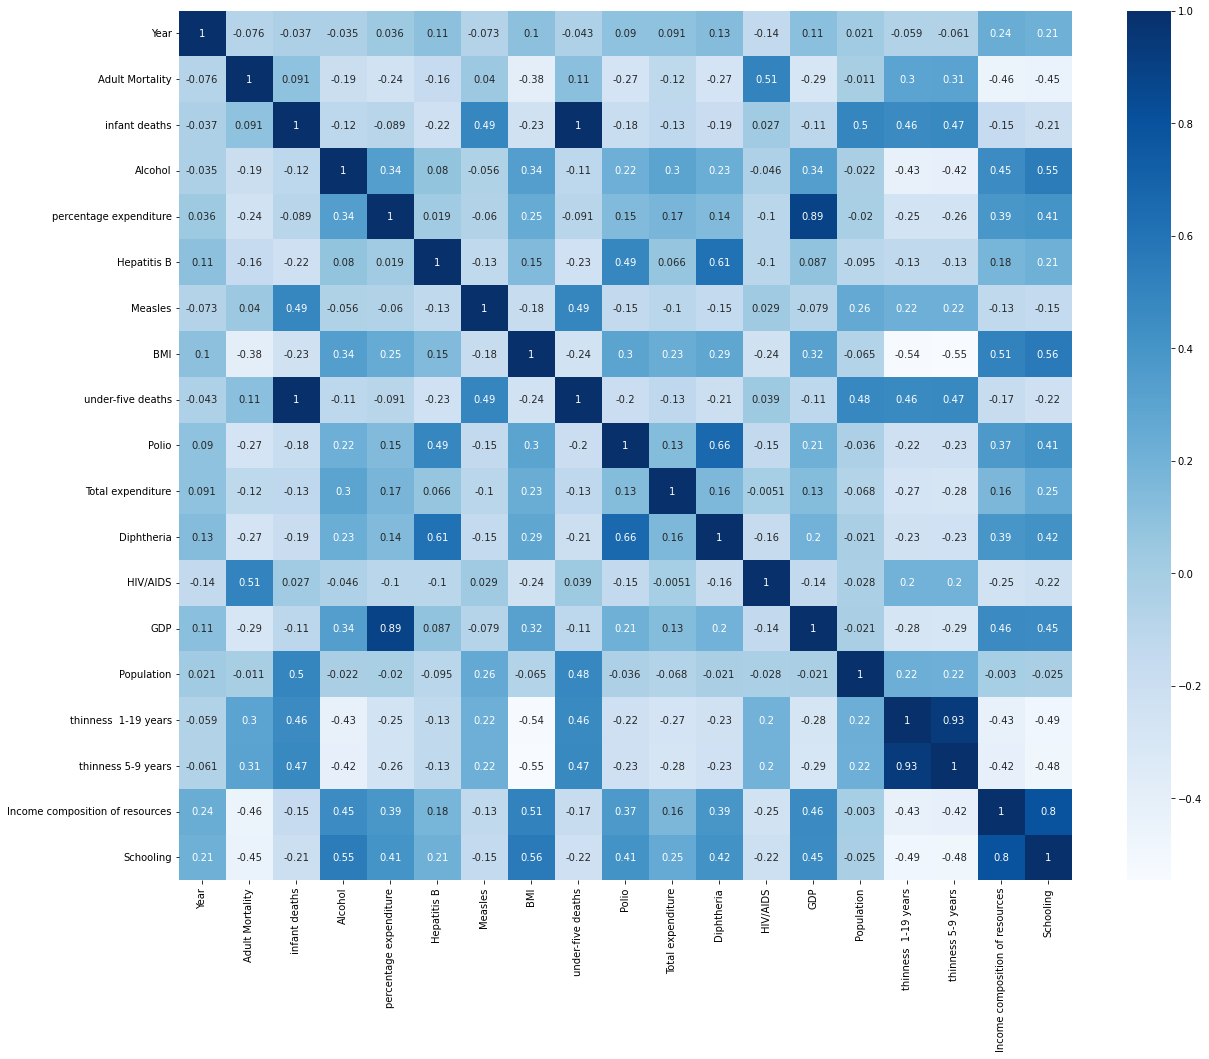

In [26]:
rcParams['figure.figsize'] = (20,16)
sns.heatmap(train_set.drop('Life expectancy', axis=1).corr(), annot=True, cmap='Blues');

### From Previous visualization, there is Positive correlation between some features:
   **1-  `GDP`, `percentage expenditure`**
   
   **2-  `thinness  1-19 years`, `thinness 5-9 years`**
   
   **3-  `under-five deaths`, `infant deaths`**
      
   **4-  `Income composition of resources`, `Schooling`**
   
### 1,2,3 logically there is correlation between them, but I am not sure if the (No.4) really correlated or not so I will drop column in pipeline and not in another to show the difference

### I will drop these two columns `GDP`, `thinness 5-9 years`  and  `under-five deaths` 
 
### I think `Year`ineffective to `life expectancy` so I will drop it

In [27]:
train_set.drop(columns = ['GDP','thinness 5-9 years','under-five deaths', 'Year'], inplace=True)
test_set.drop(columns = ['GDP','thinness 5-9 years','under-five deaths', 'Year'], inplace=True)

## Distribution of numeric columns

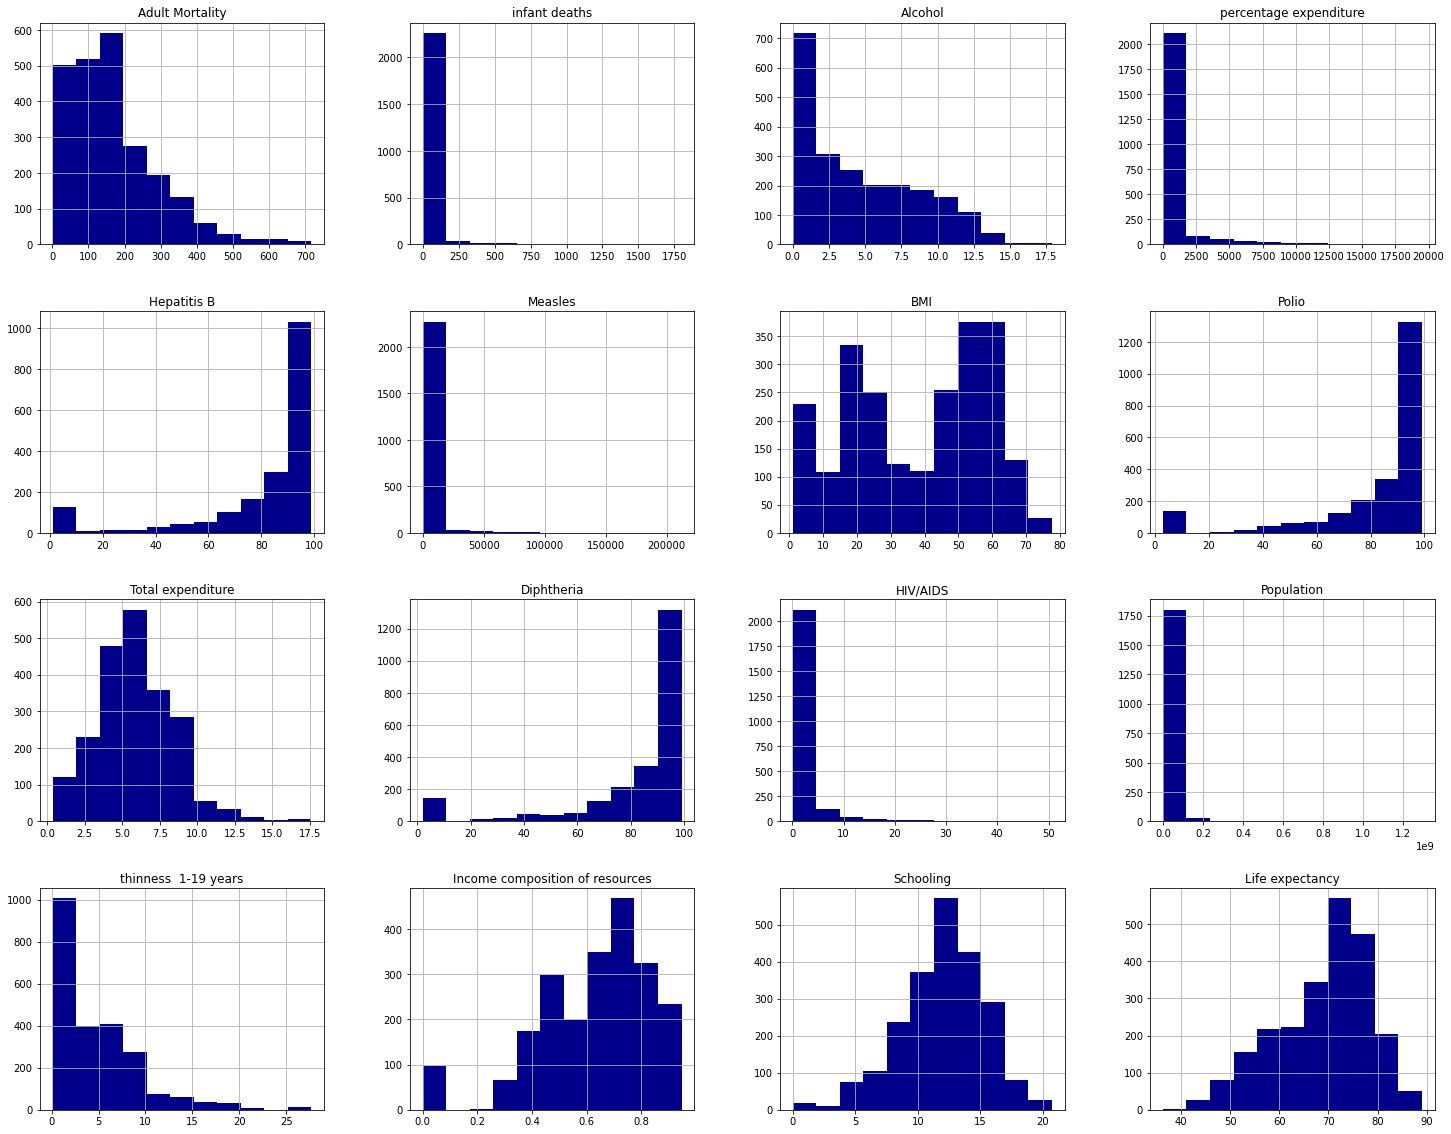

In [28]:
binwidth=2
train_set.iloc[:,:].hist(bins=11, figsize=(25,20), color='darkblue')
plt.show()

<Figure size 1440x1152 with 0 Axes>

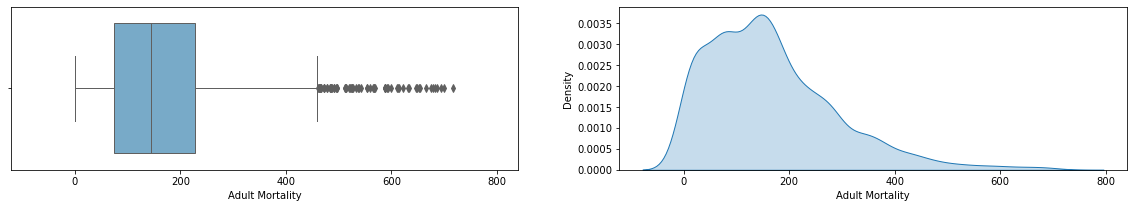

<Figure size 1440x216 with 0 Axes>

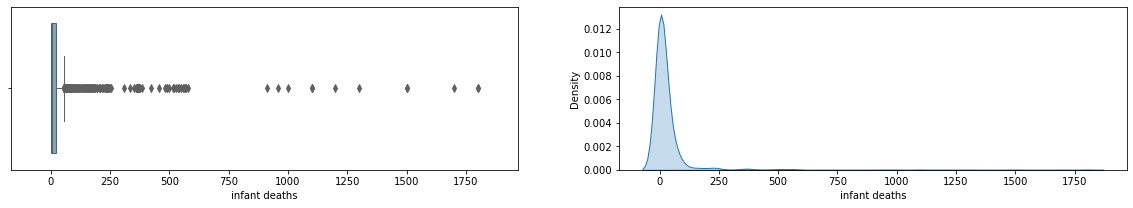

<Figure size 1440x216 with 0 Axes>

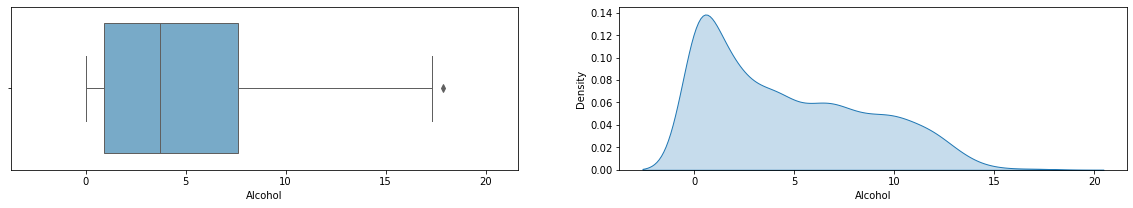

<Figure size 1440x216 with 0 Axes>

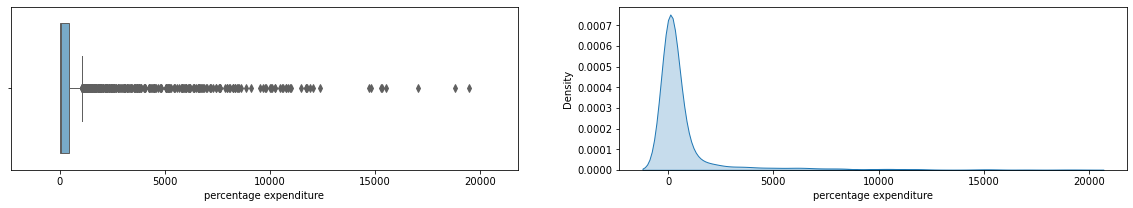

<Figure size 1440x216 with 0 Axes>

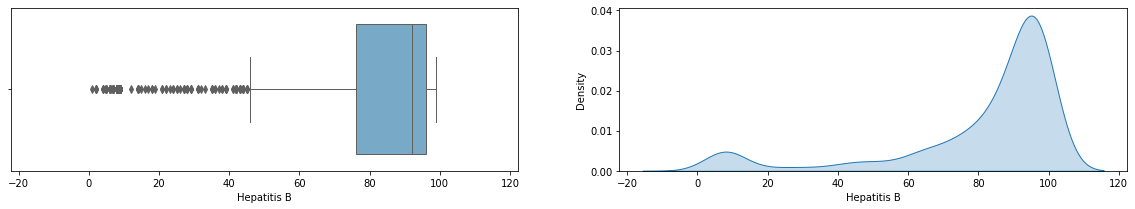

<Figure size 1440x216 with 0 Axes>

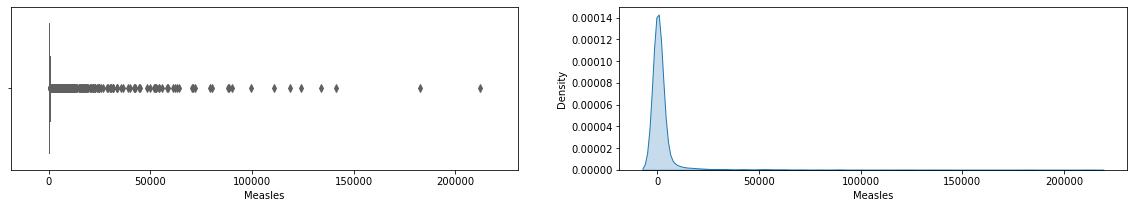

<Figure size 1440x216 with 0 Axes>

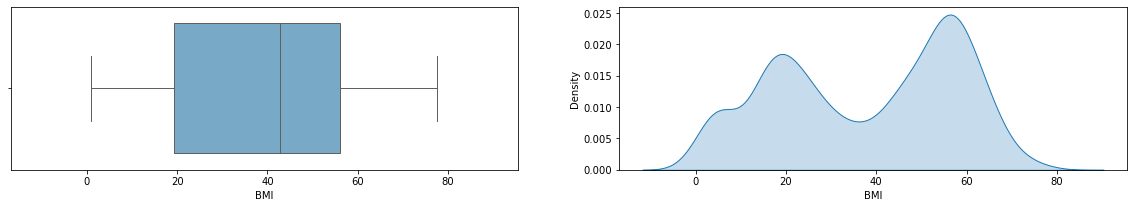

<Figure size 1440x216 with 0 Axes>

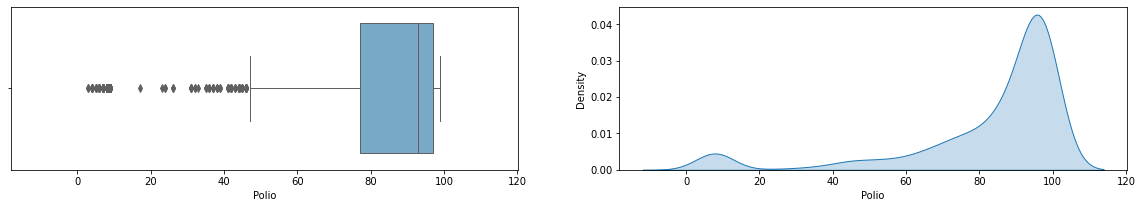

<Figure size 1440x216 with 0 Axes>

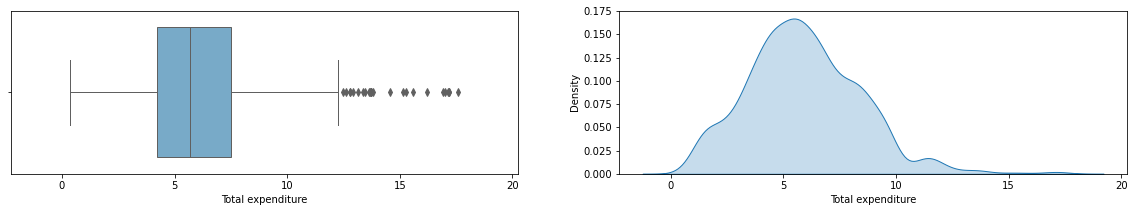

<Figure size 1440x216 with 0 Axes>

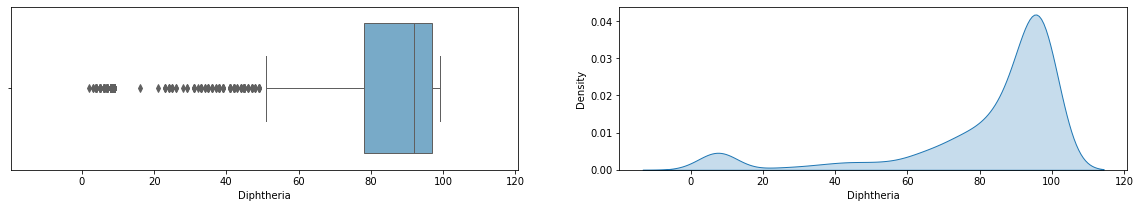

<Figure size 1440x216 with 0 Axes>

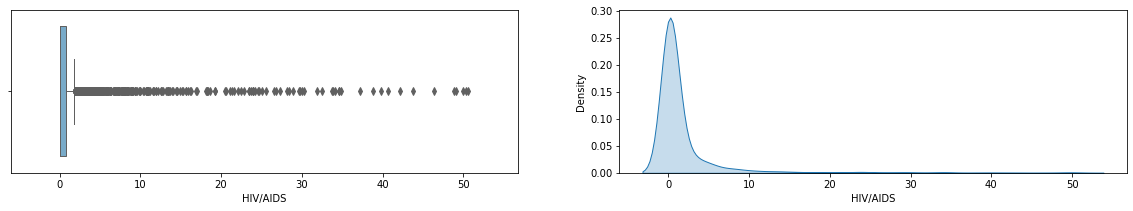

<Figure size 1440x216 with 0 Axes>

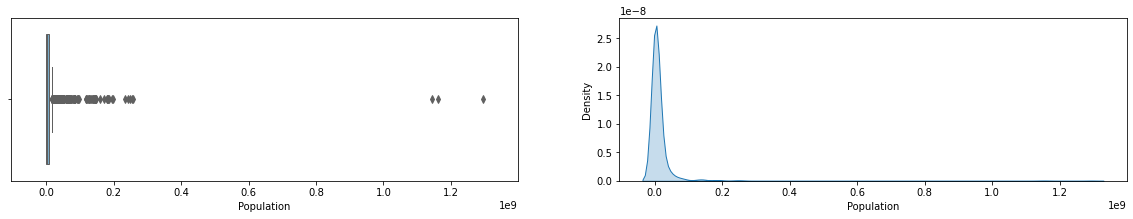

<Figure size 1440x216 with 0 Axes>

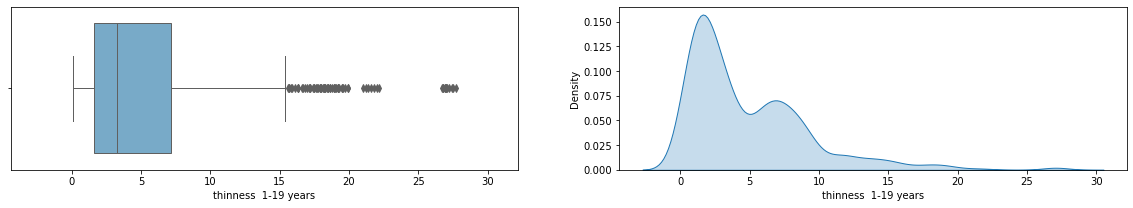

<Figure size 1440x216 with 0 Axes>

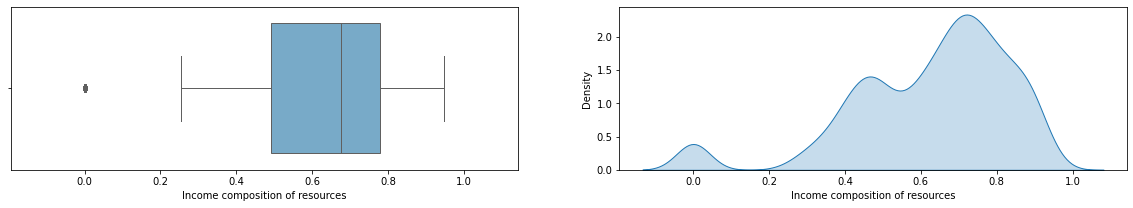

<Figure size 1440x216 with 0 Axes>

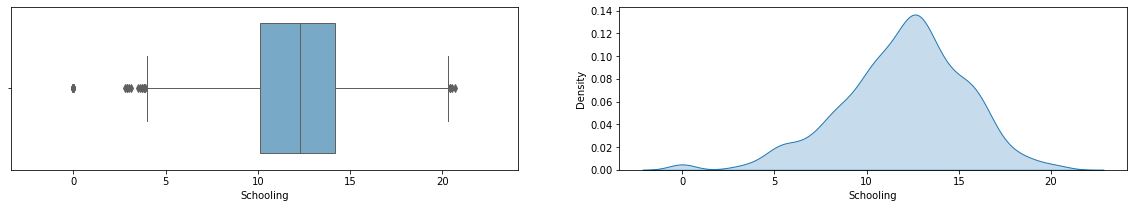

<Figure size 1440x216 with 0 Axes>

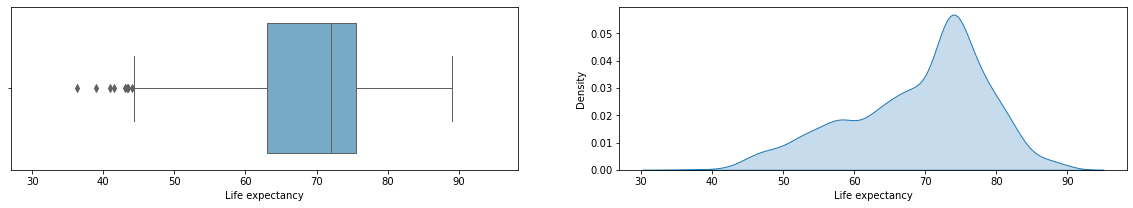

In [29]:
for col in train_set.select_dtypes(exclude='object').columns:
    
        plt.figure()
    
        rcParams['figure.figsize'] = (20,3) 
        fig, (ax_box, ax_kde) = plt.subplots(ncols=2, sharex=True)
    
        plt.gca().set(xlabel= col,ylabel='Density')    
        sns.boxplot(train_set[col], ax=ax_box , linewidth= 1.0, palette='Blues')
        sns.kdeplot(train_set[col], ax=ax_kde , fill=True, palette='Blues')
    
        plt.show();

### From Previous Pipeline, there are columns are skewed, when I tried to apply log transform, the accuracy become naegtive 😢, So I didn't apply log transform 

In [30]:
numeric_cols = list(train_set.select_dtypes(exclude='object').columns)
print(numeric_cols)

['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling', 'Life expectancy']


In [31]:
train_set[numeric_cols].skew() 

Adult Mortality                     1.169312
infant deaths                       9.709195
Alcohol                             0.597701
percentage expenditure              4.512307
Hepatitis B                        -1.908250
Measles                             9.402678
BMI                                -0.206544
Polio                              -2.064445
Total expenditure                   0.606437
Diphtheria                         -2.041765
HIV/AIDS                            5.359182
Population                         17.605151
thinness  1-19 years                1.673095
Income composition of resources    -1.097248
Schooling                          -0.525447
Life expectancy                    -0.618894
dtype: float64

### From Previous, it's clear there is some columns are skewed before I handle them I will impute NaN values first and then apply log transform

# Dealing with nan values

In [32]:
train_set.isna().sum()

Country                              0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            155
percentage expenditure               0
Hepatitis B                        444
Measles                              0
BMI                                 26
Polio                               14
Total expenditure                  182
Diphtheria                          14
HIV/AIDS                             0
Population                         511
thinness  1-19 years                26
Income composition of resources    130
Schooling                          130
Life expectancy                      0
Continent                            0
dtype: int64

In [33]:
test_set.isna().sum()

Country                              0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                             38
percentage expenditure               0
Hepatitis B                        109
Measles                              0
BMI                                  6
Polio                                5
Total expenditure                   44
Diphtheria                           5
HIV/AIDS                             0
Population                         133
thinness  1-19 years                 6
Income composition of resources     30
Schooling                           30
Life expectancy                      0
Continent                            0
dtype: int64

In [34]:
NaN_cols = list(train_set.columns[train_set.isna().sum() != 0])
print(NaN_cols)

['Alcohol', 'Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'Population', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


In [35]:

# for col in NaN_cols:
#     train_set[col] = train_set.groupby('Continent')[col].apply(lambda x:x.fillna(x.median()))
#     test_set[col] = train_set.groupby('Continent')[col].apply(lambda x:x.fillna(x.median()))
# #     try:
# #     train_set[col] = train_set.groupby('Country')[col].apply(lambda x:x.fillna(x.median()))
# #     except:

##  I want to impute nan values of each column with median of each country (error)
## when I tried to impute nan values of each column with median of each continent (run without errors) but when
## applied this to test_set,  every column has nan values still founded and the whole column become nan values (588 NaN) 

In [36]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
train_set[NaN_cols] = imp.fit_transform(train_set[NaN_cols])
test_set[NaN_cols] = imp.transform(test_set[NaN_cols])

In [37]:
train_set.isna().sum()

Country                            0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
Population                         0
thinness  1-19 years               0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
Continent                          0
dtype: int64

In [38]:
test_set.isna().sum()

Country                            0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
Population                         0
thinness  1-19 years               0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
Continent                          0
dtype: int64

### Drop Country

In [39]:
train_set.drop(['Country'],axis=1,inplace=True)
test_set.drop(['Country'],axis=1,inplace=True)

In [40]:
train_set.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling,Life expectancy,Continent
2268,Developing,126.0,1,9.38,742.510971,97.0,0,58.3,93.0,9.89,91.0,0.1,719977.0,2.1,0.7670,14.0,74.9,Europe
1680,Developing,179.0,0,4.14,369.631710,88.0,0,26.4,88.0,4.24,88.0,0.1,124621.0,7.9,0.6830,12.5,71.5,Africa
2785,Developing,376.0,92,3.44,0.000000,86.0,3413,19.6,89.0,4.21,86.0,7.4,1445958.0,7.3,0.6755,12.3,56.2,Africa
2512,Developed,62.0,0,6.90,8105.590882,92.0,25,56.5,98.0,9.23,98.0,0.1,9219637.0,1.3,0.8970,15.7,81.1,Europe
1090,Developing,275.0,4,3.72,0.000000,87.0,153,26.3,87.0,5.70,87.0,3.2,177526.0,7.1,0.4210,9.2,58.9,Africa


In [41]:
test_set.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling,Life expectancy,Continent
2399,Developing,449.0,46,7.60,782.598714,74.0,5857,46.4,75.0,8.39,76.0,19.0,5.255813e+06,8.1,0.622,12.8,56.5,Africa
196,Developing,14.0,118,0.01,62.349885,96.0,5625,15.8,96.0,3.16,96.0,0.1,1.539119e+08,18.7,0.545,9.4,73.0,Asia
2316,Developed,59.0,0,1.89,6041.858981,97.0,42,32.4,97.0,4.22,97.0,0.1,1.445958e+06,2.2,0.917,15.4,82.5,Asia
1735,Developing,11.0,0,0.01,648.133178,9.0,0,6.2,94.0,7.25,94.0,0.1,6.261000e+03,1.9,0.797,15.1,75.6,Europe
1102,Developing,38.0,5,2.16,2.527115,92.0,1158,19.0,65.0,5.62,6.0,4.6,1.321220e+05,9.6,0.000,7.4,53.0,Africa


## Split data train_set and test_set to X, y to try some of algorithms to choose the best of them

In [42]:
X_train = train_set.drop('Life expectancy',axis=1)
y_train = train_set[['Life expectancy']]
X_test = test_set.drop('Life expectancy',axis=1)
y_test = test_set[['Life expectancy']]

In [43]:
numeric_cols = list(train_set.select_dtypes(exclude='object').columns)
numeric_cols.remove('Life expectancy')

## Apply Std_scaler to numeric_cols and ord_encoder to cat_cols

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
enc = OrdinalEncoder()
std = StandardScaler()
X_train[numeric_cols] = std.fit_transform(X_train[numeric_cols])
X_train[['Status','Continent']] = enc.fit_transform(X_train[['Status','Continent']] )

In [45]:
X_test[numeric_cols] = std.transform(X_test[numeric_cols])
X_test[['Status','Continent']] = enc.transform(X_test[['Status','Continent']])

In [46]:
X_test.shape

(586, 17)

In [47]:
X_train.shape

(2342, 17)

In [48]:
y_train.shape

(2342, 1)

In [49]:
y_test.shape

(586, 1)

In [50]:
from lazypredict.Supervised import LazyRegressor

regressor = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:21<00:00,  4.80s/it]


In [51]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.97,0.97,1.62,0.85
RandomForestRegressor,0.97,0.97,1.70,2.49
HistGradientBoostingRegressor,0.96,0.96,1.74,0.77
LGBMRegressor,0.96,0.96,1.75,0.13
XGBRegressor,0.96,0.96,1.79,0.30
BaggingRegressor,0.96,0.96,1.85,0.27
GradientBoostingRegressor,0.94,0.95,2.15,0.75
DecisionTreeRegressor,0.92,0.92,2.61,0.04
ExtraTreeRegressor,0.91,0.91,2.78,0.03


## Ensample learning models are Good

In [52]:
# from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)

In [53]:
# y_pred = model.predict(X_test)

In [54]:
# from sklearn.metrics import r2_score, mean_absolute_error

# print(mean_absolute_error(y_pred,y_test))
# print(r2_score(y_pred,y_test))

In [59]:
from sklearn.ensemble import (RandomForestRegressor ,
                                HistGradientBoostingRegressor,
                                ExtraTreesRegressor)
from sklearn.model_selection import cross_val_score, cross_validate

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [60]:
lg = LGBMRegressor()
lg.fit(X_train,y_train)

train_score = lg.predict(X_train)
train_r2 = r2_score(train_score,y_train)
train_mae = mean_absolute_error(train_score,y_train)


scores1 = cross_validate(lg, X_train, y_train, cv=5, scoring=['r2'])
scores2 = cross_validate(lg, X_train, y_train, cv=5, scoring=['neg_mean_absolute_error'])
avg_r2 = scores1['test_r2'].mean()
avg_mae = -scores2['test_neg_mean_absolute_error'].mean()

pred = lg.predict(X_test)
test_r2 = r2_score(pred,y_test)
test_mae = mean_absolute_error(pred,y_test)


dic = {'R2 (%)':[train_r2*100, avg_r2*100, test_r2*100],
       
       'MAE':[train_mae, avg_mae, test_mae] }

Evaluation = pd.DataFrame(dic, index=['Train', 'Avg_cv', 'Test'])
Evaluation.round(2)

,R2 (%),MAE
Train,98.92,0.64
Avg_cv,95.78,1.27
Test,96.36,1.14


In [61]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

train_score = rf.predict(X_train)
train_r2 = r2_score(train_score,y_train)
train_mae = mean_absolute_error(train_score,y_train)


scores1 = cross_validate(rf, X_train, y_train, cv=5, scoring=['r2'])
scores2 = cross_validate(rf, X_train, y_train, cv=5, scoring=['neg_mean_absolute_error'])
avg_r2 = scores1['test_r2'].mean()
avg_mae = -scores2['test_neg_mean_absolute_error'].mean()

pred = rf.predict(X_test)
test_r2 = r2_score(pred,y_test)
test_mae = mean_absolute_error(pred,y_test)


dic = {'R2 (%)':[train_r2*100, avg_r2*100, test_r2*100],
       
       'MAE':[train_mae, avg_mae, test_mae] }

Evaluation = pd.DataFrame(dic, index=['Train', 'Avg_cv', 'Test'])
Evaluation.round(2)

,R2 (%),MAE
Train,99.40,0.44
Avg_cv,95.66,1.24
Test,96.42,1.09


In [62]:
extra = ExtraTreesRegressor()
extra.fit(X_train,y_train)

train_score = extra.predict(X_train)
train_r2 = r2_score(train_score,y_train)
train_mae = mean_absolute_error(train_score,y_train)


scores1 = cross_validate(extra, X_train, y_train, cv=5, scoring=['r2'])
scores2 = cross_validate(extra, X_train, y_train, cv=5, scoring=['neg_mean_absolute_error'])
avg_r2 = scores1['test_r2'].mean()
avg_mae = -scores2['test_neg_mean_absolute_error'].mean()

pred = extra.predict(X_test)
test_r2 = r2_score(pred,y_test)
test_mae = mean_absolute_error(pred,y_test)


dic = {'R2 (%)':[train_r2*100, avg_r2*100, test_r2*100],
       
       'MAE':[train_mae, avg_mae, test_mae] }

Evaluation = pd.DataFrame(dic, index=['Train', 'Avg_cv', 'Test'])
Evaluation.round(2)

,R2 (%),MAE
Train,100.00,0.00
Avg_cv,96.51,1.03
Test,96.93,0.93
